**EDA y Exploracion de datos**

In [1]:
#Importar librerías necesarias
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

- Games

In [2]:
df_games= pd.read_parquet("../Datasets/steam_games.parquet")
df_games

,genres,app_name,price,item_id,developer,Año_estreno
88310,Action,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
88310,Casual,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
88310,Indie,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
88310,Simulation,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
88310,Strategy,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018
...,...,...,...,...,...,...
120442,Racing,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018
120442,Simulation,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018
120443,Casual,EXIT 2 - Directions,4.99,658870,"xropi,stev3ns",2017
120443,Indie,EXIT 2 - Directions,4.99,658870,"xropi,stev3ns",2017


In [3]:
#Análisis inicial al dataset para ver su composición.
df_games.info()
print("----"*15)
print(f"Datos Duplicados: {df_games.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 74831 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genres       74831 non-null  object 
 1   app_name     74831 non-null  object 
 2   price        74831 non-null  float64
 3   item_id      74831 non-null  Int64  
 4   developer    74831 non-null  object 
 5   Año_estreno  74831 non-null  object 
dtypes: Int64(1), float64(1), object(4)
memory usage: 4.1+ MB
------------------------------------------------------------
Datos Duplicados: 0


In [4]:
#Exploración de datos estadísticos: 
df_games.describe()

,price,item_id
count,74831.000000,74831.0
mean,8.405953,466252.762638
std,15.923331,173165.313485
min,0.000000,10.0
25%,1.990000,344155.0
50%,4.990000,462680.0
75%,9.990000,602075.0
max,995.000000,2028850.0


In [5]:
#Verificar que no haya valores nulos
valores_nulos = df_games.isnull().sum()
print(valores_nulos)

genres         0
app_name       0
price          0
item_id        0
developer      0
Año_estreno    0
dtype: int64


In [6]:
#Diferenciar variables cuantitativas 
num_cols = df_games.select_dtypes(include=['number']).columns
print ("Las variables númericas son: ", (num_cols.values))

num_cols = num_cols.drop("item_id")
print ("Las variables númericas son: ", (num_cols.values))

Las variables númericas son:  ['price' 'item_id']
Las variables númericas son:  ['price']


In [7]:
df_games.price.value_counts()

price
4.99      9893
9.99      9010
0.00      8463
2.99      7834
0.99      6319
          ... 
2.89         1
99.00        1
599.00       1
8.98         1
234.99       1
Name: count, Length: 147, dtype: int64

In [8]:
#1. Identificar las variables categóricas
variables_categoricas = df_games.select_dtypes(include=['object']).columns
print (variables_categoricas)

Index(['genres', 'app_name', 'developer', 'Año_estreno'], dtype='object')


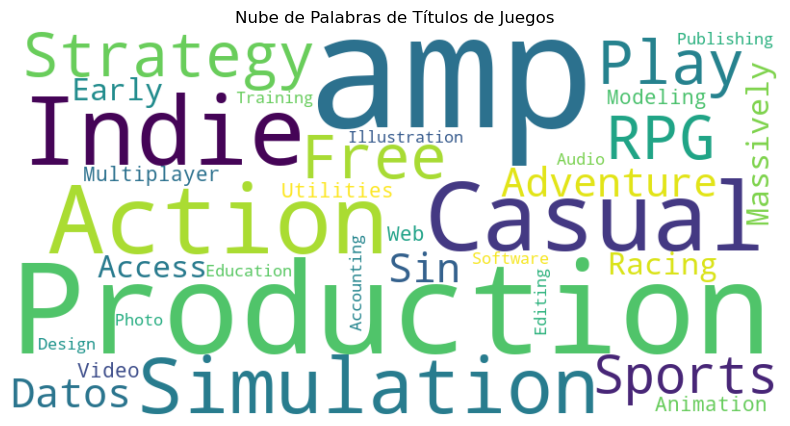

In [22]:
#Nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

titulos = df_games["genres"].unique()

#Combina los títulos en una sola cadena
texto = ' '.join(titulos)

#Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

#Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Juegos')
plt.show()

In [23]:
#Crear un dataframe con las columnas que voy a utilizar id, app_name y genre
df_modelo_item= df_games[["item_id", "app_name", "genres"]]
df_modelo_item

,item_id,app_name,genres
88310,761140,Lost Summoner Kitty,Action
88310,761140,Lost Summoner Kitty,Casual
88310,761140,Lost Summoner Kitty,Indie
88310,761140,Lost Summoner Kitty,Simulation
88310,761140,Lost Summoner Kitty,Strategy
...,...,...,...
120442,610660,Russian Roads,Racing
120442,610660,Russian Roads,Simulation
120443,658870,EXIT 2 - Directions,Casual
120443,658870,EXIT 2 - Directions,Indie


In [29]:
#Guardadar Parquet
df_modelo_item.to_parquet("../Datasets/modelo_item.parquet")